In [158]:
import flax
from jax import numpy as jnp
import jax
import matplotlib.pyplot as plt

In [159]:
@jax.jit
def soft_plus(x: float):
    return jnp.log1p(jnp.exp(x))


@jax.jit
def relu(x: float):
    return jnp.maximum(x, 0)

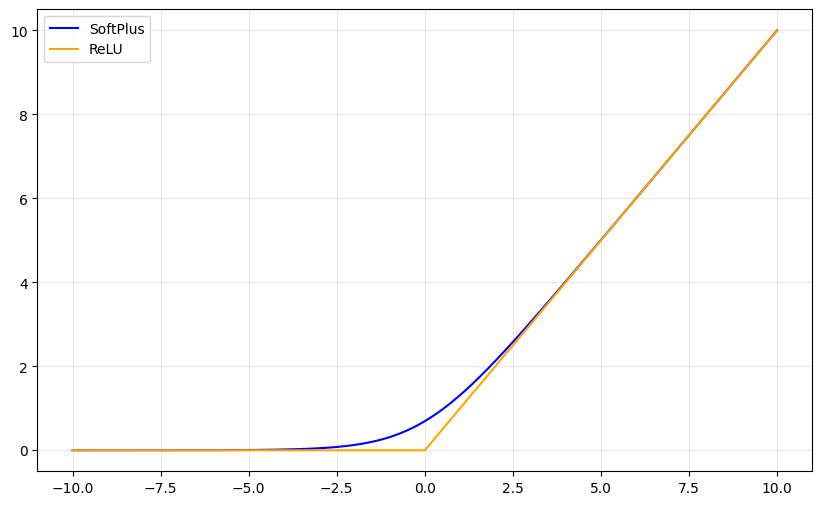

In [160]:
x = jnp.linspace(-10, 10, 500)
y_softplus = soft_plus(x)
y_relu = relu(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_softplus, label="SoftPlus", color="blue")
plt.plot(x, y_relu, label="ReLU", color="orange")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [161]:
@jax.jit
def drug_nn_soft(dosage: float) -> float:
    a1 = dosage * 3.34 - 1.43
    a2 = dosage * -3.53 + 0.57

    b1 = soft_plus(a1) * -1.22
    b2 = soft_plus(a2) * -2.3

    return b1 + b2 + 2.61

In [162]:
@jax.jit
def drug_nn_ra(dosage: float) -> float:
    a1 = dosage * 1.7 - 0.85
    a2 = dosage * 12.6

    b1 = relu(a1) * -40.8
    b2 = relu(a2) * 2.7

    return relu(b1 + b2 -16.0)

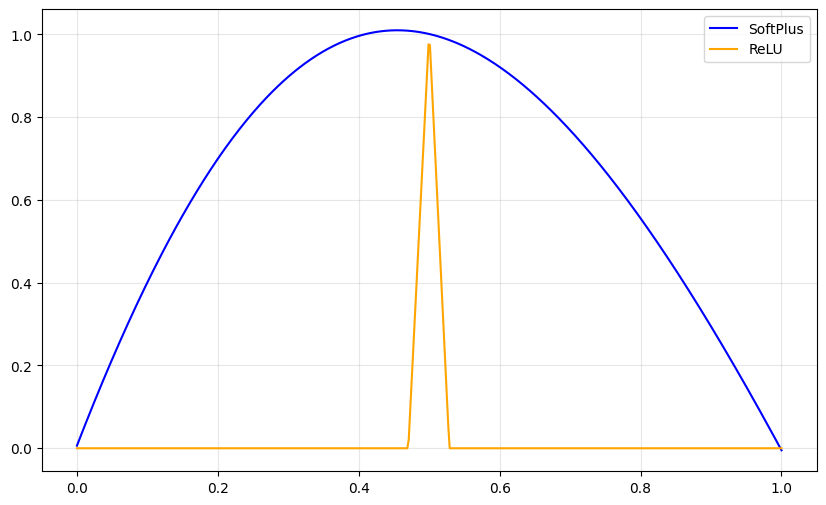

In [163]:
x = jnp.linspace(0, 1, 500)
y_softplus = jax.vmap(drug_nn_soft)(x)
y_relu = jax.vmap(drug_nn_ra)(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_softplus, label="SoftPlus", color="blue")
plt.plot(x, y_relu, label="ReLU", color="orange")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Flax

In [164]:
from flax import linen as nn
from flax.linen import initializers
from jax.typing import ArrayLike

class NN(nn.Module):
    @nn.compact
    def __call__(self, x: ArrayLike) -> ArrayLike:
        x = nn.Dense(features=2)(x)
        x = nn.relu(x)
        x = nn.Dense(features=1)(x)
        return nn.relu(x)


In [165]:
from jax import random

random_state = random.PRNGKey(44)
model = NN()

In [166]:
final_res = {
    'Dense_0': {
        'kernel': jnp.array([[1.7, 12.6]]),
        'bias': jnp.array([-0.85, 0.0]),
    },
    'Dense_1': {
        'kernel': jnp.array([[-40.8], [ 2.70]]),
        'bias': jnp.array([-16.0])
    },
}

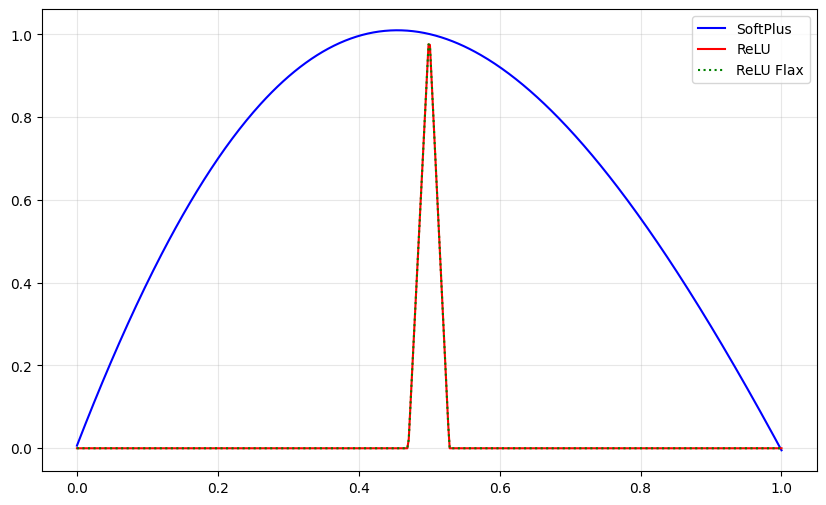

In [172]:
x = jnp.linspace(0, 1, 500)
y_softplus = jax.vmap(drug_nn_soft)(x)
y_relu = jax.vmap(drug_nn_ra)(x)
y_flax = jax.vmap(lambda x: model.apply({ 'params': train_res }, jnp.array([x]))[0])(x)
y_flax_fin = jax.vmap(lambda x: model.apply({ 'params': final_res }, jnp.array([x]))[0])(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_softplus, label="SoftPlus", color="blue")
plt.plot(x, y_relu, label="ReLU", color="red")
plt.plot(x, y_flax_fin, label="ReLU Flax", color="green", linestyle="dotted")

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()